## Data Visualization of used FORD cars by Python

### Source of the Data: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### In this work, I have picked FORD used cars' in UK dataset, collected primarily from the above mentioned link and used data visualization with Python to demonstrate different features of this dataset.

#### Importing libraries & reading file

In [64]:
#importing necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

In [65]:
#reading the csv file using panda

df= pd.read_csv("ford.csv")

In [66]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### Basic informations about this dataset:
- Model: Different models of FORD brand
- Year: Year it was manufactured
- Price: Its selling price
- Transmission: Transmission is the process through which power is transformed into momentum and thus car moves. Types of Transmission in this dataset: (Automatic, Manual or Semi-automatic)
- Mileage: Miles travelled by since it was bought
- Fueltype: Fuel it uses
- MPG: Fuel required (measured in gallon) per mile
- Enginesize: Its engine feature- volume of fuel and air that can be pushed through a car's cylinder

#### Checking number of unique values for different columns

In [67]:
#Checking Total Number of Unique Models presented in the data

total_models= len(df['model'].unique())
total_years= len(df['year'].unique())
total_transmission= len(df['transmission'].unique())
total_fuelType = len(df['fuelType'].value_counts())

print("Total number of unique MODELS' data presented : ", total_models )
print("Total number of YEARS' data presented: ", total_years )
print("Total number of unique TRANSMISSION types existing in the data : ", total_transmission )
print("Total number of FUELTYPE present in the data: ", total_fuelType)

Total number of unique MODELS' data presented :  23
Total number of YEARS' data presented:  22
Total number of unique TRANSMISSION types existing in the data :  3
Total number of FUELTYPE present in the data:  5


#### Function to determine percentage of different values under a specific feature

In [68]:
def percent_count_df(data, col):
    
    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)                                         # Creating dataframe
    col_count = col_count.reset_index()                                         # Rearranging index
    col_count = col_count.rename(columns= {'index':col, col: '% of Cars'} )     # Renaming appropriate index
    col_count['% of Cars'] = col_count['% of Cars']*100
    col_count['% of Cars'] = col_count['% of Cars'].round(2)         # Transforming into percentage & rounded figure
    
    return col_count

In [69]:
# Calling functions create dataframe with appropriate percentage value

fuelType_count = percent_count_df(df, 'fuelType')
transmission_count = percent_count_df(df, 'transmission')
model_count = percent_count_df(df, 'model')

In [70]:
year_count = percent_count_df(df, 'year')
year_count = year_count.sort_values(by='year')                #Arranging years in an order to show in barplot
#display(year_count.head())

#### Creating function for Barplot

In [71]:
def barplot(data, x_column, y_column, color, yticks, rotation, palette):
    sns.barplot(x=x_column, y=y_column, data=data, color=color, palette=palette)
    plt.title("Percentage of cars with different " + x_column)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_column)
    plt.ylabel("Percentage of Cars")

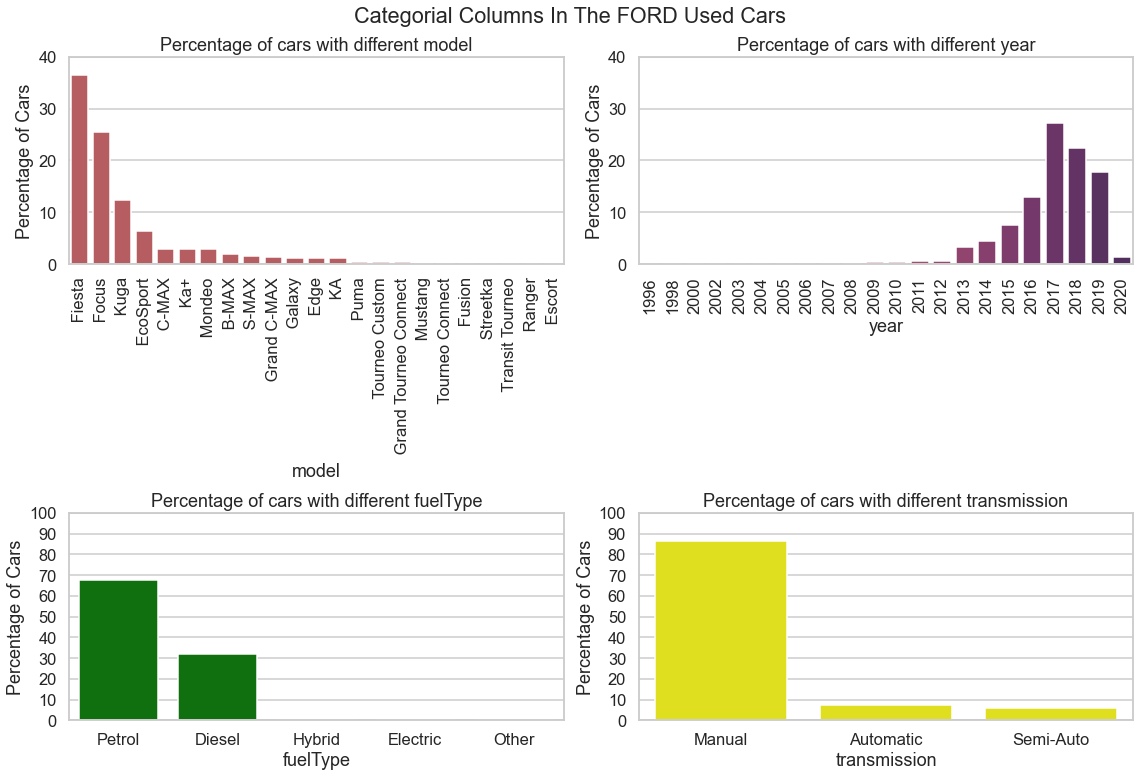

In [72]:
plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
barplot(model_count, 'model', '% of Cars', 'r', np.arange(0,41,10), 90, None )    #Barplot- Model VS % of Cars


plt.subplot(2,2,2)
barplot(year_count, 'year', '% of Cars', 'blue', np.arange(0,41,10), 90, "flare")  #Barplot- Year VS % of Cars


plt.subplot(2,2,3)
barplot(fuelType_count, 'fuelType', '% of Cars', 'green', np.arange(0,101,10),0, None) #Barplot- Fueltype VS % of Cars


plt.subplot(2,2,4)
barplot(transmission_count, 'transmission', '% of Cars', 'yellow', np.arange(0,101,10), 0, None ) #Barplot- Transmission VS % of Cars


plt.suptitle("Categorial Columns In The FORD Used Cars")
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()

#### Function to create Scatterplot & Regressionplot

In [73]:
def scatterplot (x,y,df,color,hue):
    sns.scatterplot(x=x, y=y, data=df, color=color, hue=hue)
    plt.xlabel(x)
    plt.ylabel(y)
    

def regplot (x,y,df, fit_reg, scatter_kws_color_and_edgecolor):
    sns.regplot(x=x, y=y, data=df, fit_reg=fit_reg, scatter_kws=scatter_kws_color_and_edgecolor)
    plt.xlabel(x)
    plt.ylabel(y)

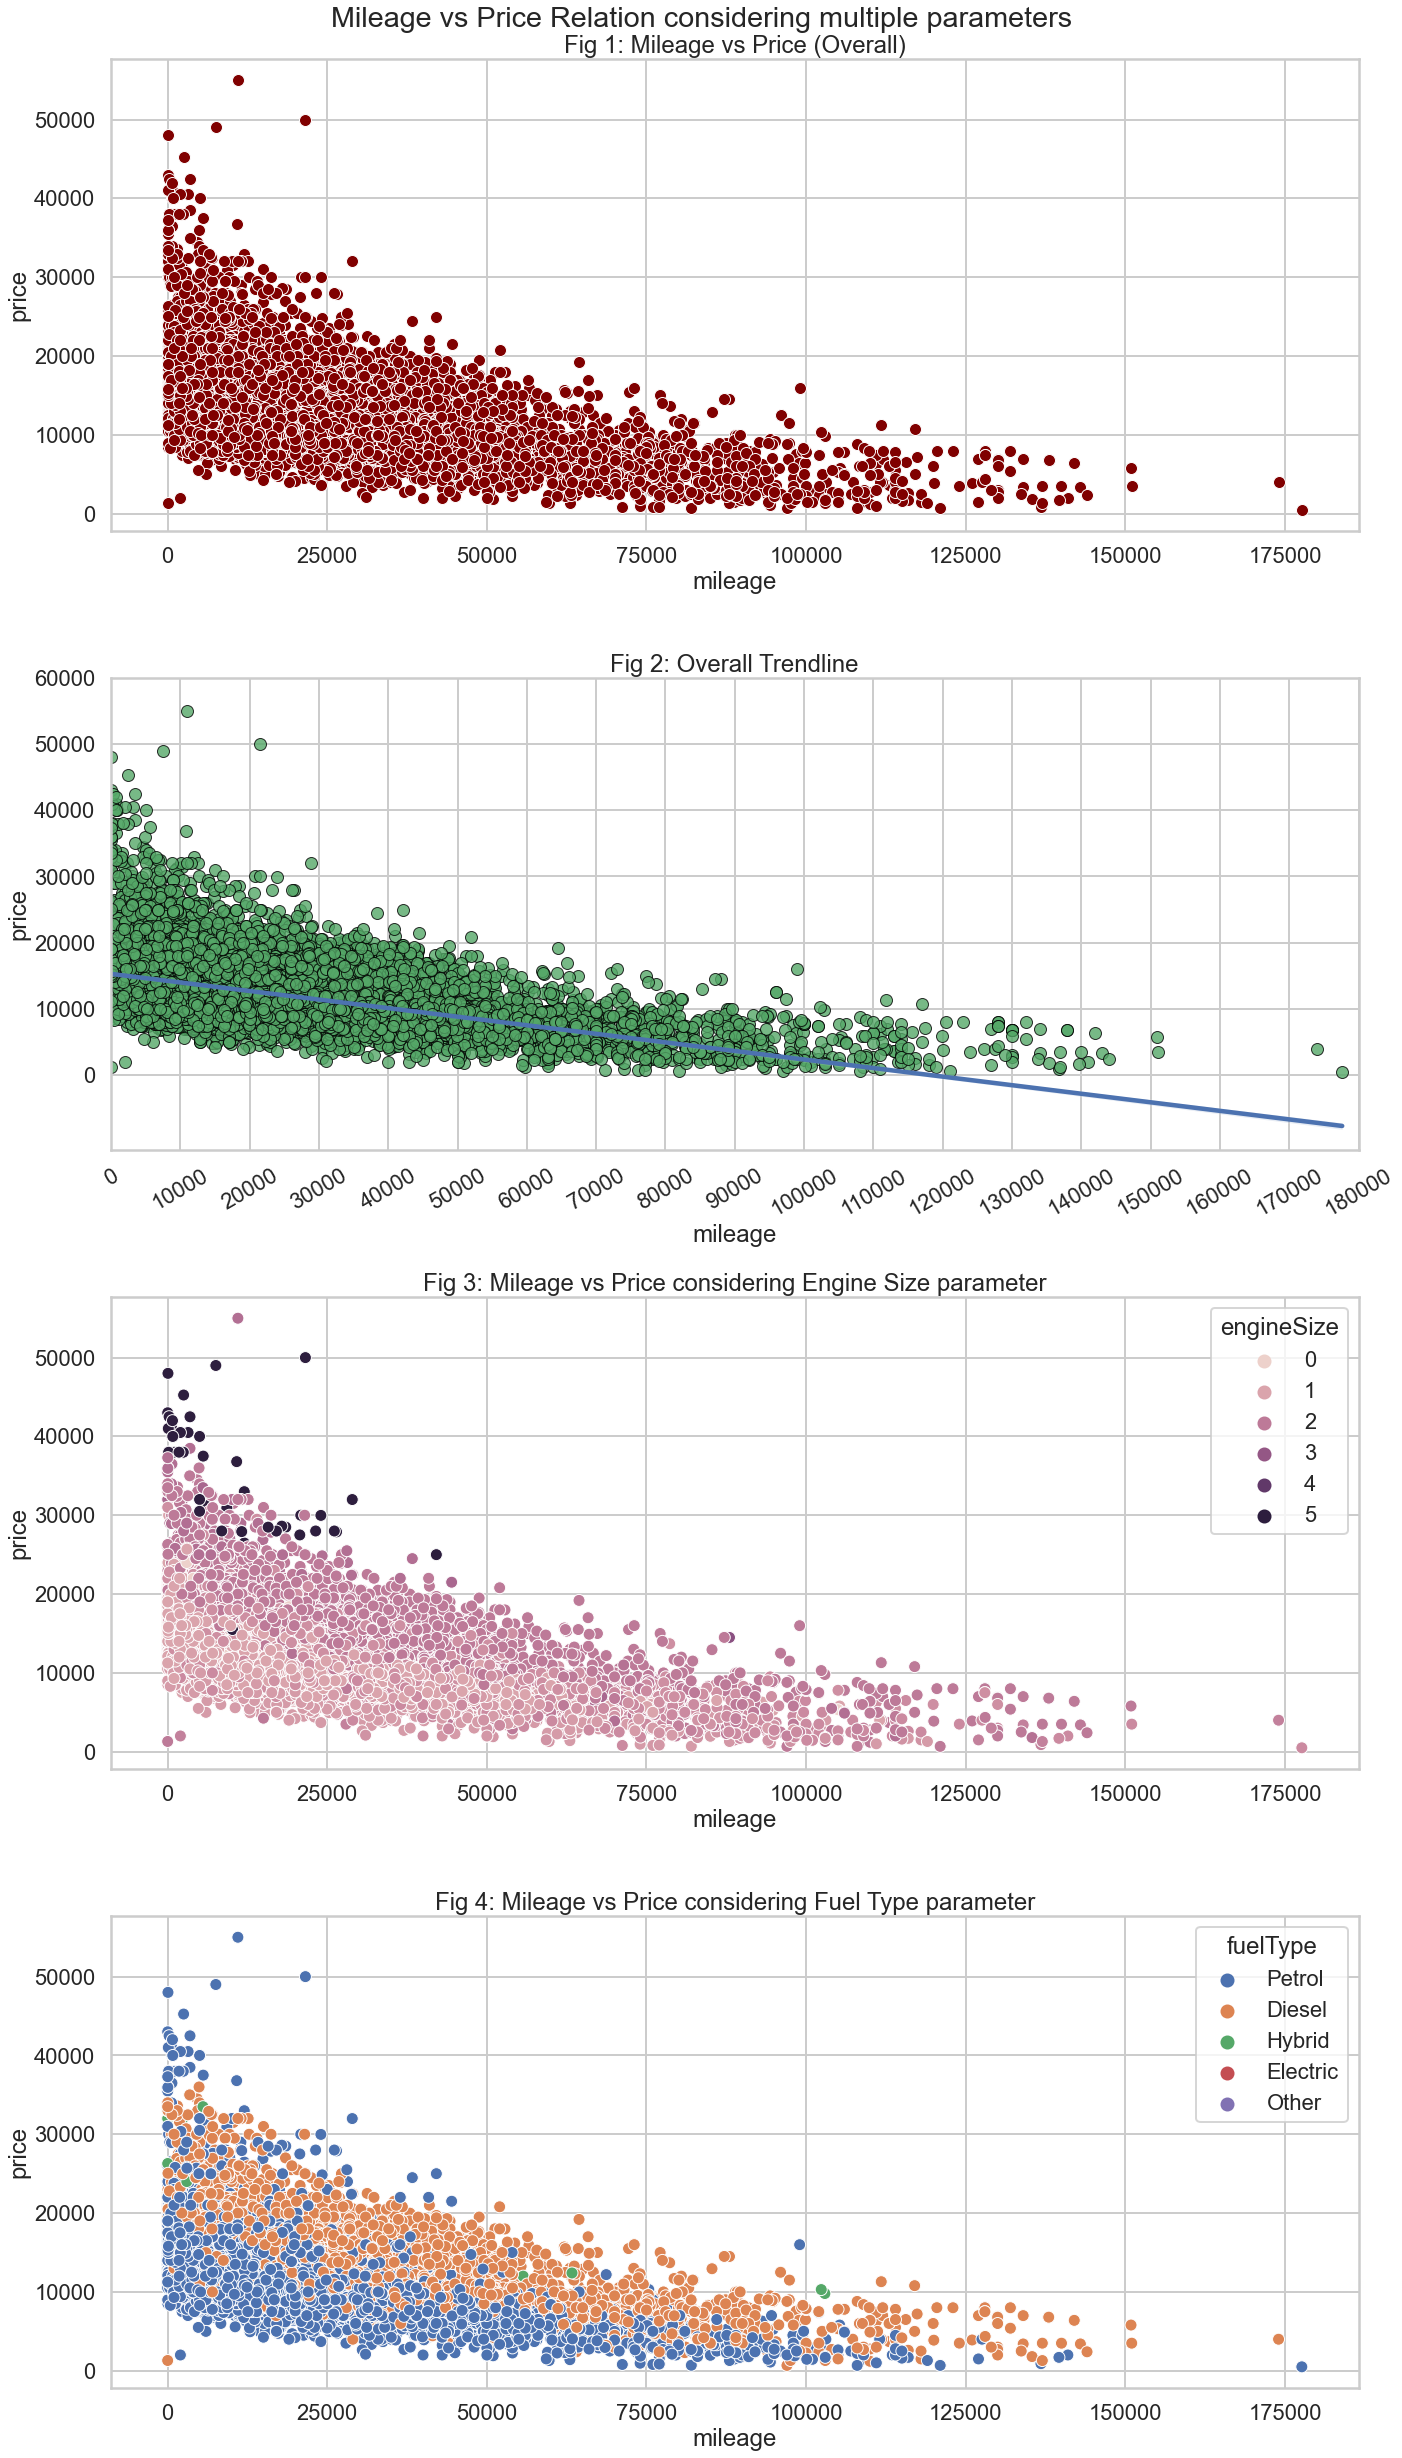

In [80]:
plt.figure(figsize=(20,35))


plt.subplot(4,1,1)
scatterplot("mileage","price",df,'maroon', None)      #Mileage vs Price scatterplot without hue
plt.title("Fig 1: Mileage vs Price (Overall)")


plt.subplot(4,1,2)
regplot("mileage","price",df, True,{'color':'g', 'edgecolor':'black'}) #Milage vs Price Regreesion plot
plt.yticks(np.arange(0,61000,10000))
plt.xticks(np.arange(0,181000,10000))
plt.xticks(rotation=30)
plt.title("Fig 2: Overall Trendline")


plt.subplot(4,1,3)
scatterplot("mileage","price", df, 'red','engineSize')                 #Mileage vs Price Scatterplot, hue=engine size
plt.title("Fig 3: Mileage vs Price considering Engine Size parameter")

plt.subplot(4,1,4)
scatterplot("mileage", "price",df, 'orange','fuelType')                #Mileage vs Price Scatterplot, hue= Fuel Type
plt.title("Fig 4: Mileage vs Price considering Fuel Type parameter")


plt.suptitle("Mileage vs Price Relation considering multiple parameters")
plt.tight_layout()
plt.show()

### From these scatterplots, it can be said that-
- In fig 1: **With decrease in mileage, price decreases too.**

- In fig 2: **Price decreases with increase in mileage.** This trend mostly follows a straighline. The showed trendline is true for approximately till the x axis reaches 100K, after that it goes to the negative which is not ideal.

- In fig 3: When we add engine size as hue parameter, It clearly shows that **for any given mileage, price of a car increases with increase in engine size.** The more upwards we move, the darker the colour it gets, which means price increases when engine size increases, for almost any given mileage. **Additionally, for a specific engine size, the vehicle with more mileage has less price.** This relation also tends to follow a straightline.

- In fig 4: This plot is biased towards Petrol & Diesel cars. The percentage of Hybrid, Electrical or Other fuelType cars' present, is not comparable with Petrol and Diesel. **But when we compare Petrol and Diesel cars, most of the petrol cars cost less then Diesel cars, for any given mileage value.  Only a very few exceptions are present in the data. But it can be underlined that, for used cars, Petrol cars cost less. Also, within any specific fuel type, the vehicle with more mileage costs less.** This relation also supports the given trend shown in fig 2.

#### Function for Histograms

In [75]:
def histogram_plot(data, x_column, bin_num, bin_wid, hue, multiple_elem, palette_type, color):
    sns.histplot(data=data, x=x_column,bins=bin_num, binwidth=bin_wid, hue=hue, multiple=multiple_elem,
                 palette=palette_type, color=color)
    plt.grid()
    
    # Title mostly differs to most of the plots so it was not included in the function.
    # Most of the time x-ticks values needs to be adjusted with the bins and binwidths, so it was not included...
    # in the function.

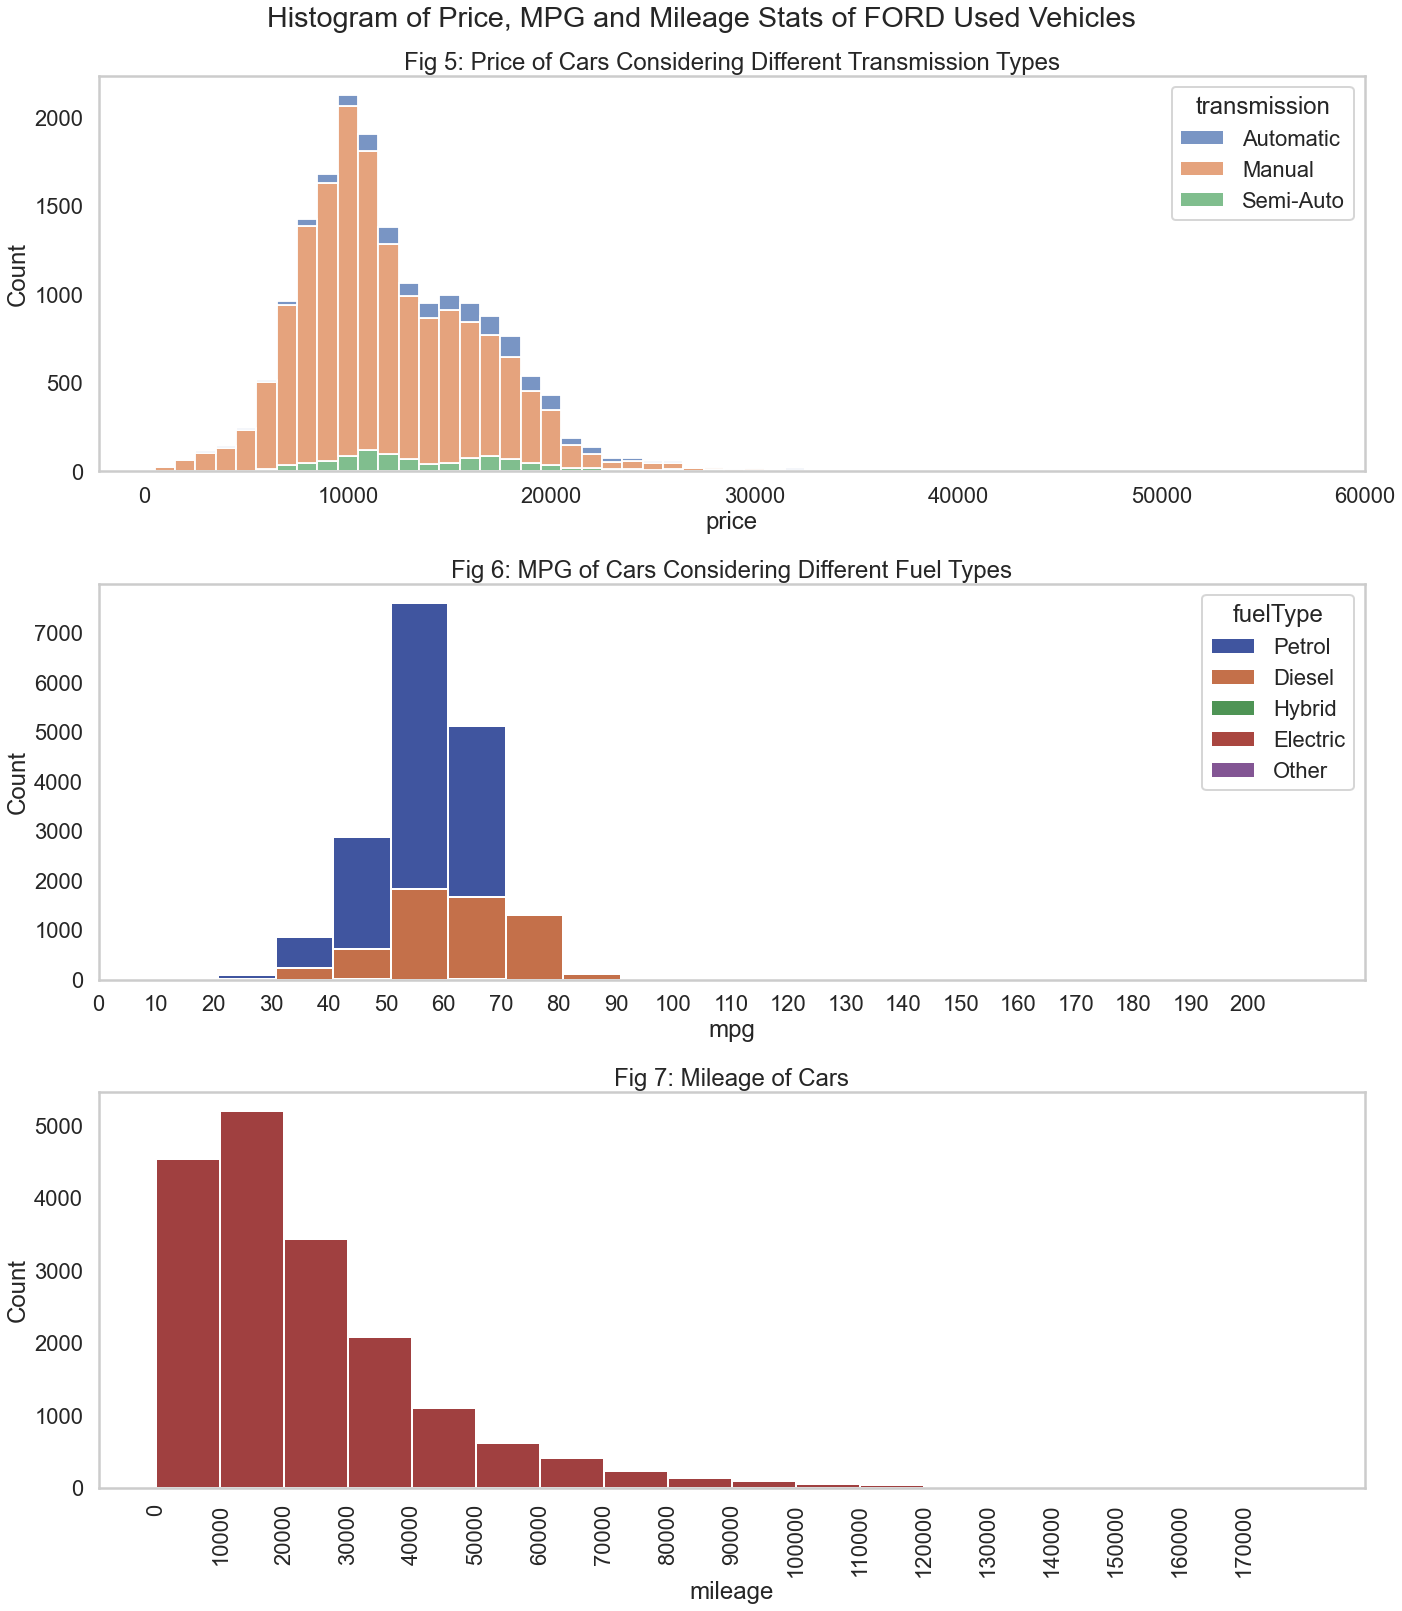

In [76]:
plt.figure(figsize=(20,23))
sns.set_context("poster")

plt.subplot(3,1,1)    #Price Histogram considering Hue: tansmission, Multiple stacks
histogram_plot(df,"price",60,1000, "transmission", "stack", None,"green")
plt.xticks(np.arange(0,60001,10000))
plt.title("Fig 5: Price of Cars Considering Different Transmission Types")

plt.subplot(3,1,2)    #MPG Histogram considering Hue: fuelType, Multiple stacks
histogram_plot(df,"mpg",21,10, "fuelType", "stack", "dark", "yellow")
plt.xticks(np.arange(0,210,10))
plt.title("Fig 6: MPG of Cars Considering Different Fuel Types")

plt.subplot(3,1,3)    #Mileage Histogram without considering any Hue
histogram_plot(df,"mileage",18,10000, None, "layer", None, "maroon")
plt.xticks(np.arange(0,180000,10000), rotation=90)
plt.title("Fig 7: Mileage of Cars")

plt.suptitle("Histogram of Price, MPG and Mileage Stats of FORD Used Vehicles")
plt.tight_layout()
plt.show()


#### Findings from these histograms: 
- **Fig 5: (1)** Highest frequency (more than 2000) is in between 11-12K price range. **(2)** Most of the **Automatic Transition Type** cars price exist after the 10K range. **(3)** **Semi-Auto Transition Type** cars price is mostly from 10-20K price range, with the highest frequency from 11-12K range.
- **Fig 6: **(1)** Highest frequency is between 50 to 60 MPG (more than 7000), for both individual fueltype comparison and combined. **(2)** This dataset is **biased towards Petrol and Diesel fueltypes of cars' and do not have mentionable amount of observations for hybrid, electric and other vehicles.**
- **Fig 7: (1)** **Highest frequency is in between 10K-20K mileage range (more than 5000). This means most owners tends to sell their cars before after passing 10000 but before it hits 20000 mileage. Approximately, Another 45000 owners sold their cars before 10000 mileage. Trend goes downward constantly after 20000 mileage.**

#### Now, If we look into the distribution plots of Price & Mileage

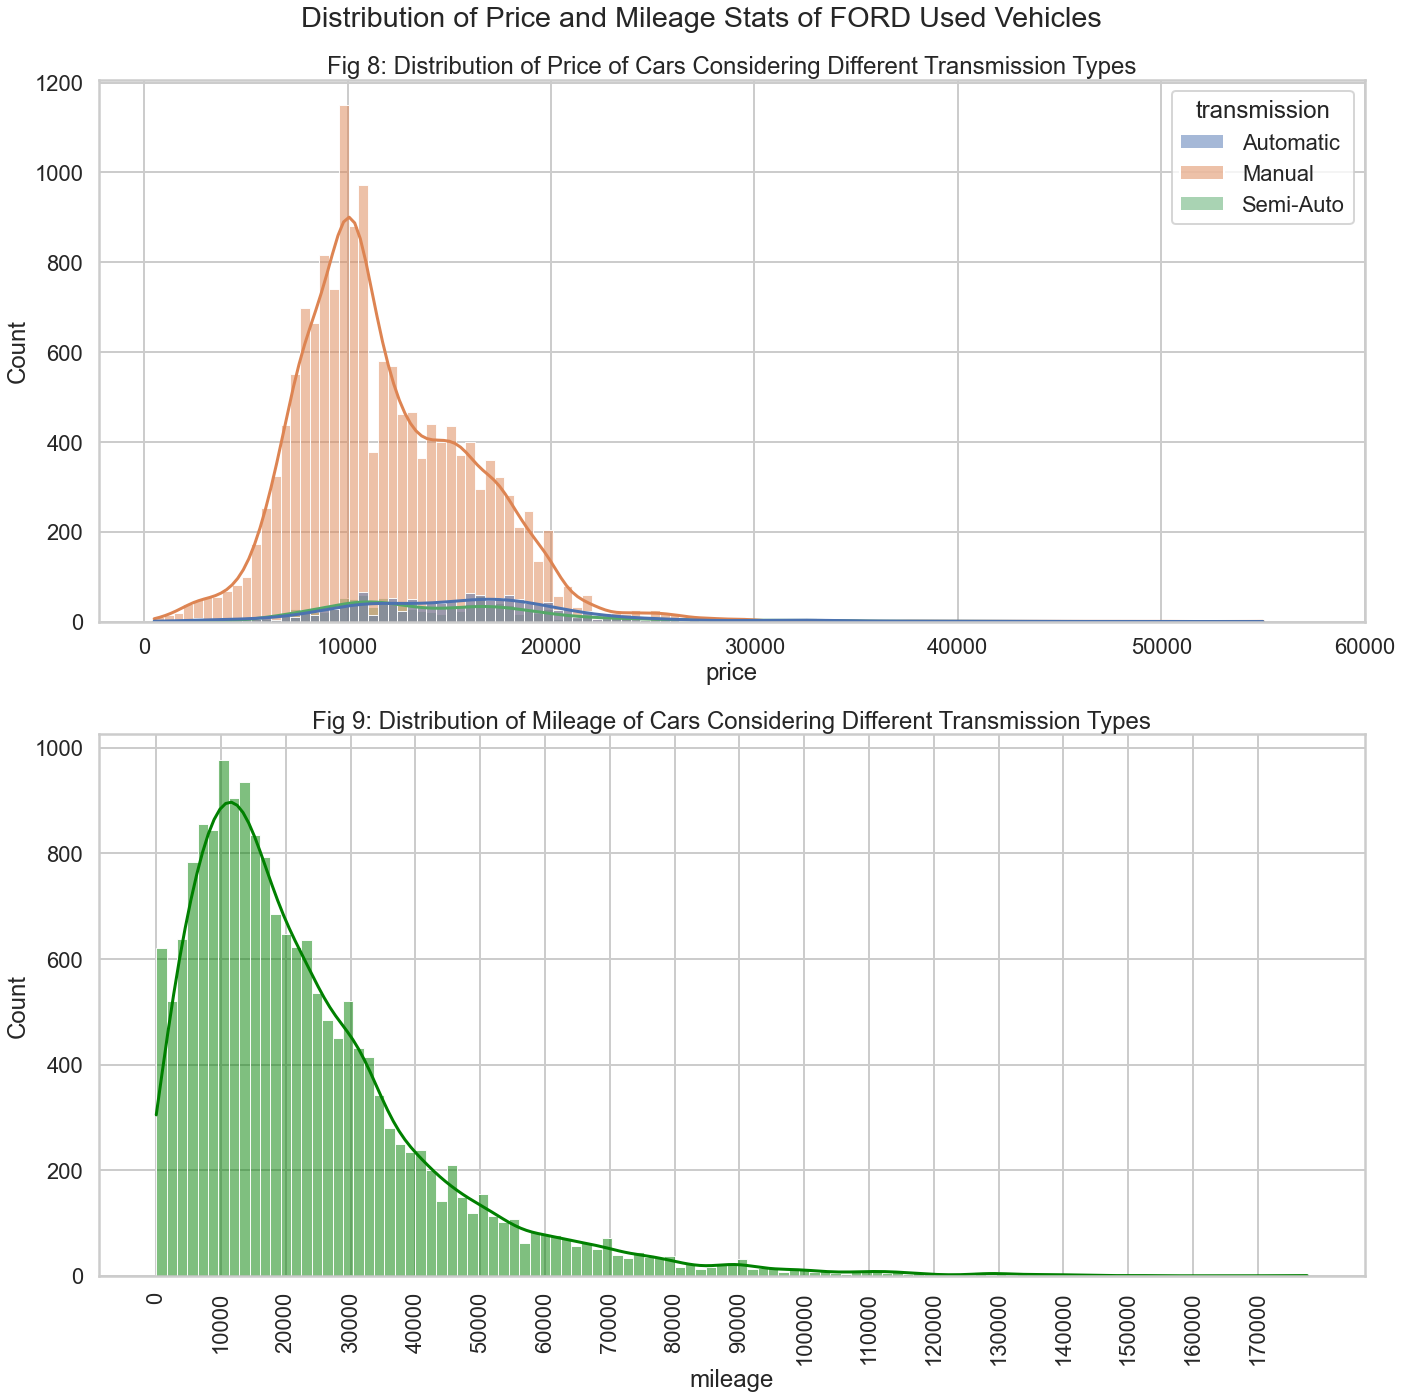

In [77]:
plt.figure(figsize=(20,20))
sns.set_context("poster")

plt.subplot(2,1,1)                                            #Price Distribution plot considering Hue: tansmission
sns.histplot(data=df,x="price", kde=True, hue= "transmission",color="green")
plt.xticks(np.arange(0,60001,10000))
plt.title("Fig 8: Distribution of Price of Cars Considering Different Transmission Types")


plt.subplot(2,1,2)                                            #Price Distribution plot considering without hue
sns.histplot(data=df,x="mileage", kde=True,color="green")
plt.xticks(np.arange(0,180000,10000), rotation=90)
plt.title("Fig 9: Distribution of Mileage of Cars Considering Different Transmission Types")


plt.suptitle("Distribution of Price and Mileage Stats of FORD Used Vehicles")
plt.tight_layout()
plt.show()

#### Findings from the distribution plots:
- Fig 8: Most of the observations are of Manual Transmission types. **(1) For Manual Transmission types:** Distribution shows a positively skewed graph with slighly bimodal feature. **(2) For Manual & Auto Transmission types:** Both the graphs show bimodal feature but both of them shows very highly platykurtic behaviour. Outliers exist.
- Fig 9: **Positively skewed distribution** for mileage data of the cars.

#### Empirical Cumulative Distribution Function (ECDF)

In [78]:
# Creating function to plot ECDF

def ECDF(data, x_column, cumulative_true_or_false, stat, fill, palette, color, fig_no):
    sns.histplot(data=data, x=x_column, cumulative=cumulative_true_or_false, stat=stat, fill=fill, palette=palette, color=color)
    plt.grid()
    plt.title("Fig " + str(fig_no) + ": ECDF of " + x_column)

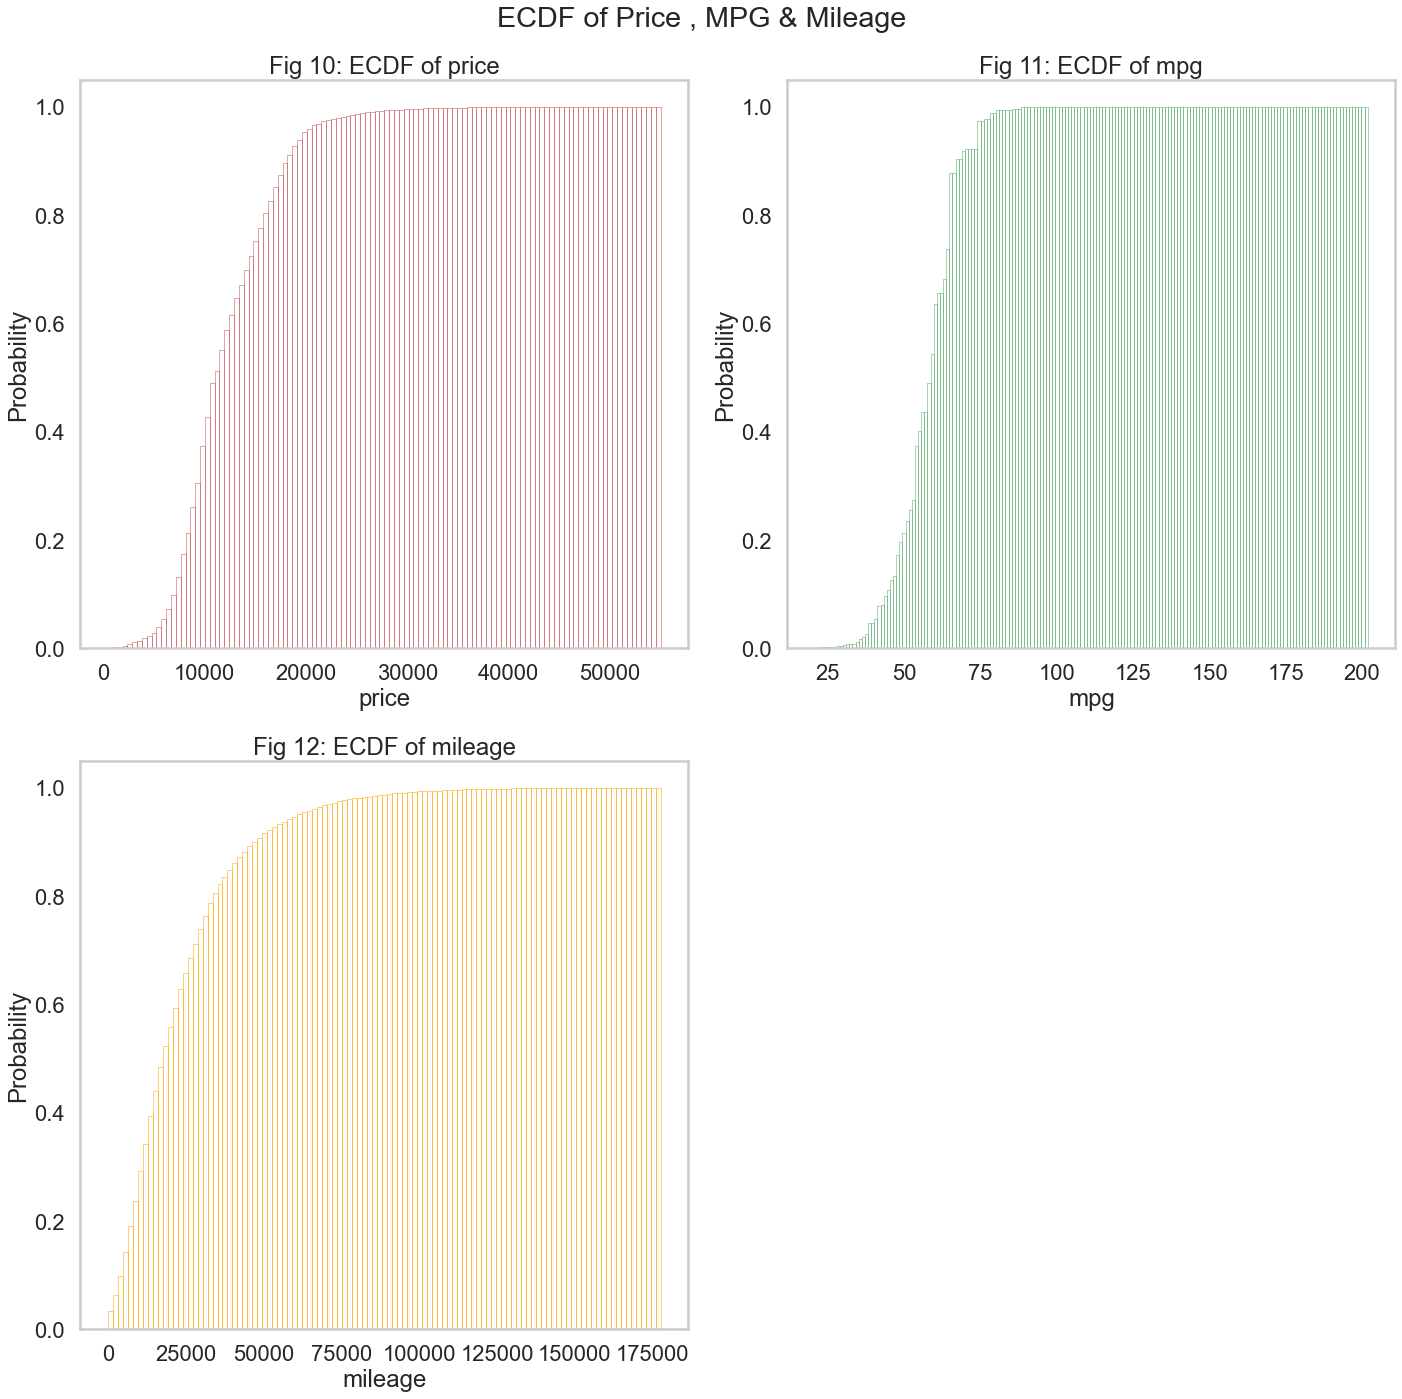

In [79]:
plt.figure(figsize=(20,20))
sns.set_context("poster")

plt.subplot(2,2,1)
ECDF(df, 'price', True,'probability', None, "dark", 'r',10)          #Calling ECDF function to plot ECDF of price

plt.subplot(2,2,2)
ECDF(df, 'mpg', True,'probability', None, "dark", 'g',11)            #Calling ECDF function to plot ECDF of mpg

plt.subplot(2,2,3)
ECDF(df, 'mileage', True,'probability', None, "dark", 'orange',12)   #Calling ECDF function to plot ECDF of mileage

plt.suptitle("ECDF of Price , MPG & Mileage")
plt.tight_layout()
plt.show()

#### Findings from the ECDF graph:
- This graph shows the ECDF of **price and mpg** of the FORD used cars. From this, probability of finding a car under any given price or MPG or Mileage can be found.